# 연령별취업자수관계

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr>
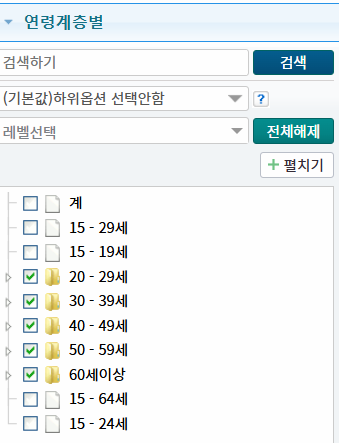
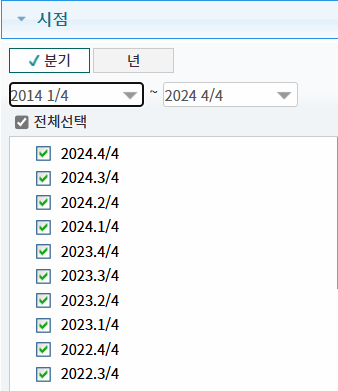
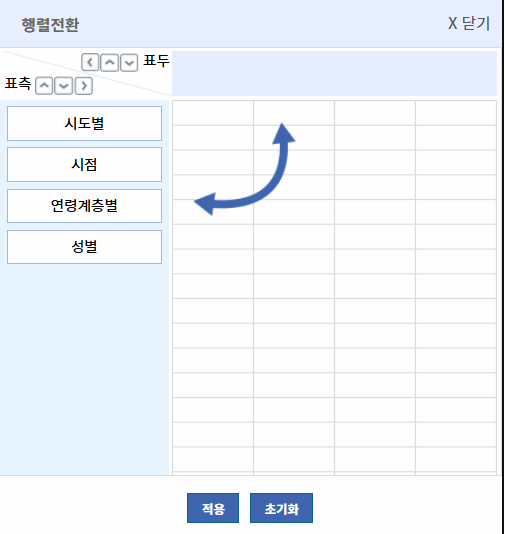

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

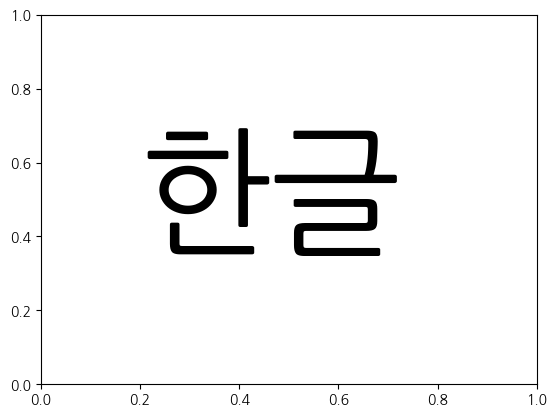

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path ="./ref/행정구역시도성연령별취업자_20250304 (2).csv" 
ori= pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() # 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시', 'value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")
ex1_data

,year,total
0,2000,20796
1,2001,21267
2,2002,21929
3,2003,21965
4,2004,22426
...,...,...
64,2024,28433
65,2024.1/4,27927
66,2024.2/4,28689
67,2024.3/4,28682


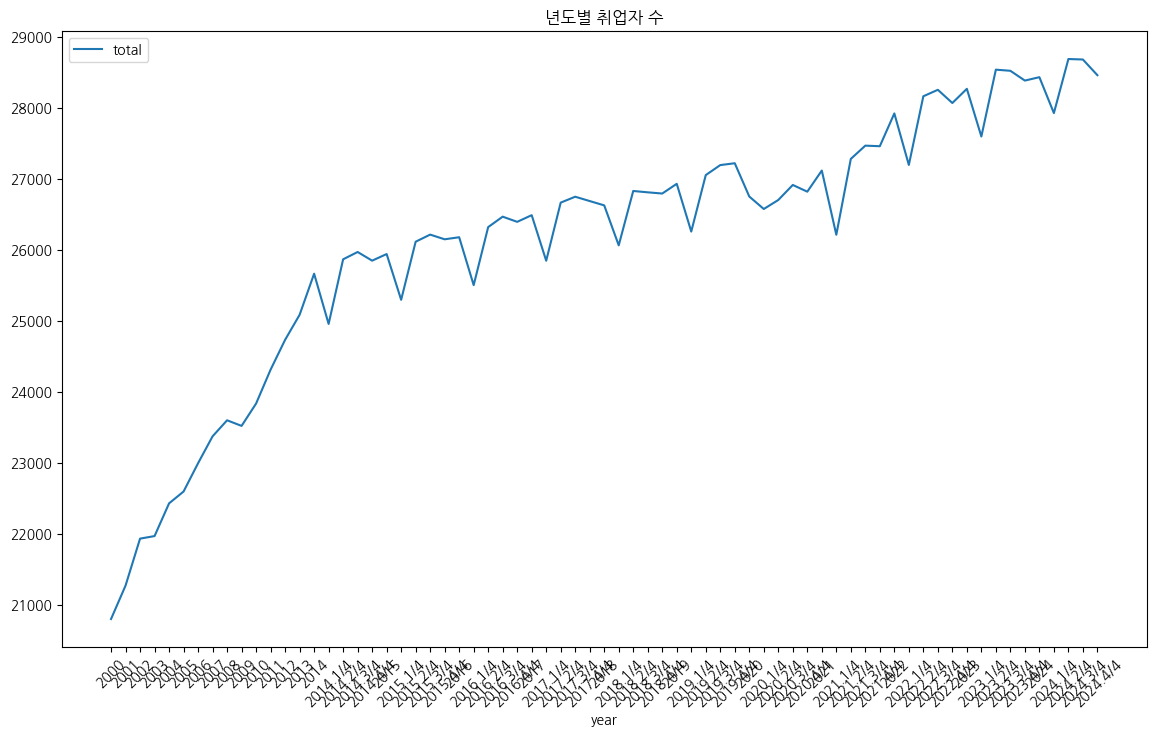

In [6]:
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [7]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시', 'value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2000,남자,12219
1,2000,여자,8577
2,2001,남자,12448
3,2001,여자,8819
4,2002,남자,12853
...,...,...,...
133,2024.2/4,여자,12716
134,2024.3/4,남자,15945
135,2024.3/4,여자,12737
136,2024.4/4,남자,15868


In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

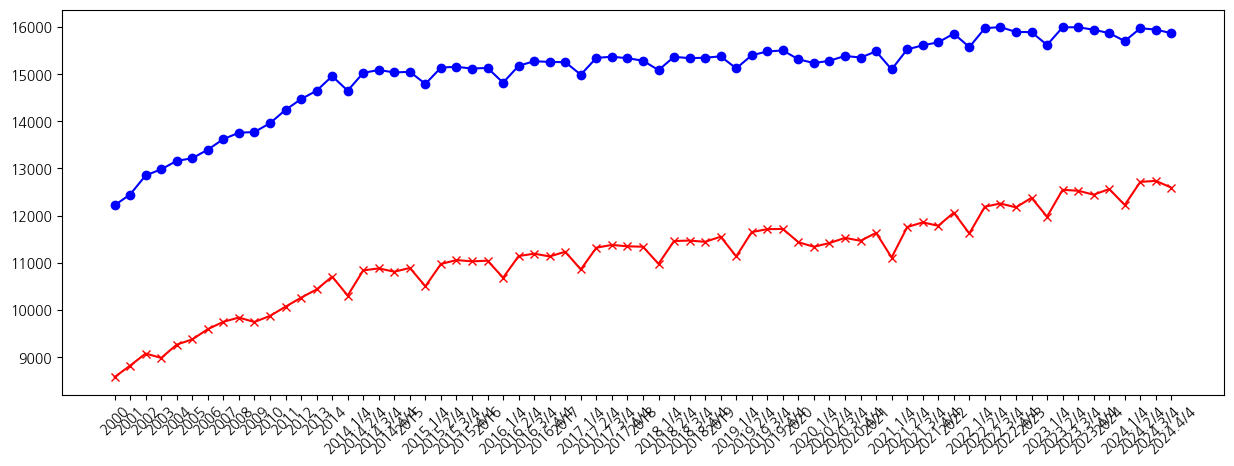

In [10]:
plt.figure(figsize=(15,5))
plt.plot(male['year'], male['total'], label='남자', color="blue", linestyle='-', marker='o')
plt.plot(female['year'], female['total'], label='여자', color="red", linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

# 인사이트
1. 전체적으로 증가하는 추세
- 그래프에서 남녀 모두 취업자 수가 점진적으로 증가하는 경향을 보임
- 장기적으로 노동시장 규모가 확대되고 있음을 나타냄

2. 남성 취업자 수 > 여성 취업자 수
- 남성(파란선)이 여성(빨간선)보다 항상 높은 수준 유지
- 성별 간 취업률 격차가 존재하지만, 여성 취업자 수도 꾸준히 증가

3. 여성 취업자 수 증가율이 더 뚜렷함
- 그래프를 보면 남성은 비교적 일정한 패턴을 보이는 반면, 여성은 꾸준히 상승
- 이는 여성의 경제활동 참여 증가, 일·가정 양립 정책, 산업 변화(서비스업 중심) 등의 영향으로 해석 가

4. 반복적인 계절적 패턴
- 그래프의 일정한 주기적 변화가 보임 → 계절적 요인 가능성
- 분기별 또는 특정 시즌에 취업률이 변동하는 경향이 있음 (졸업 시즌, 연말연초 고용 변화 등)

5. 최근 몇 년간 남녀 모두 증가 폭이 커짐
- 2020년 이후 여성 취업자 증가가 두드러짐
- 코로나 이후 고용 회복, 비대면·IT·서비스업 성장 등이 여성 취업 기회를 확대했을 가능성

결론:
- 남성 취업자가 여전히 많지만, 여성 취업자 증가 속도가 빠름
- 노동시장 구조 변화, 정책 지원, 산업 변화 등이 영향을 미치는 것으로 보임
- 계절적 패턴이 존재하므로, 이를 고려한 고용 정책이 필요함

In [11]:
ex3_data = ori.copy()
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace("-",0).astype(int)
ex3_data['데이터']

0        331
1        460
2        774
3        519
4        773
        ... 
11515     43
11516     54
11517     45
11518     48
11519     49
Name: 데이터, Length: 11520, dtype: object

In [12]:
filter0 = (ex3_data['시점']>= "2018.1/4") & (ex3_data['시점'] < "2019.1/4")
ex3_data = ex3_data[filter0]
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [13]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex3_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [14]:
import numpy as np
regions = list(x.index) # 라벨
color = [ np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

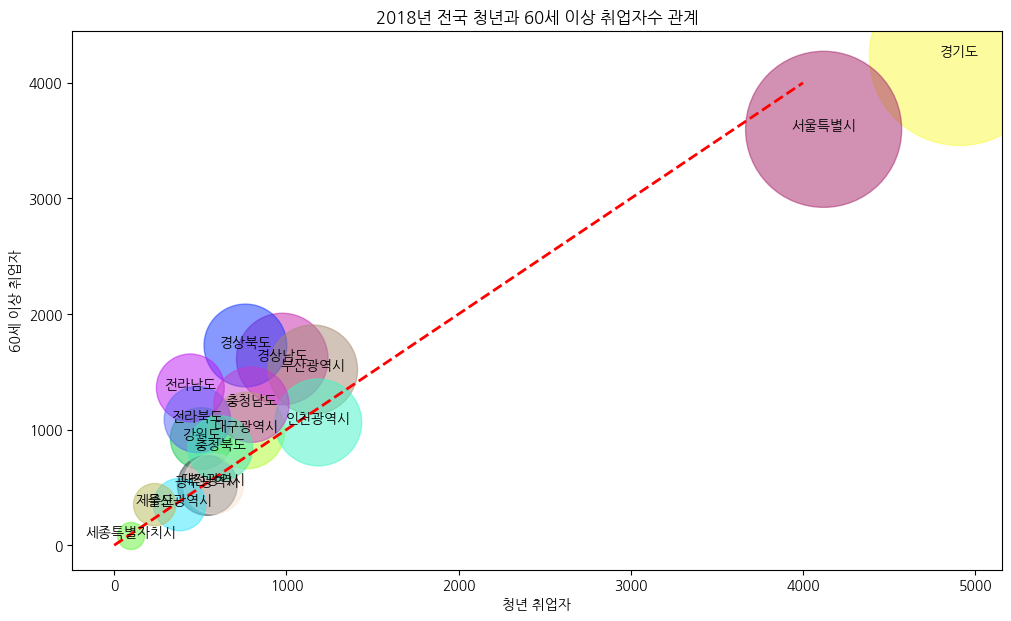

In [15]:
fig , ax = plt.subplots(figsize=(12,7))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y, s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha="center")

ax.plot([0,4000],[0,4000], color="r", linestyle="--", linewidth=2)

ax.set_title("2018년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")
plt.show()

In [16]:
ex4_data = ori.copy()
ex4_data.loc[:,'데이터'] = ex4_data.loc[:,'데이터'].replace("-",0).astype(int)
ex4_data['데이터']

0        331
1        460
2        774
3        519
4        773
        ... 
11515     43
11516     54
11517     45
11518     48
11519     49
Name: 데이터, Length: 11520, dtype: object

In [17]:
filter_24 = (ex4_data['시점']>='2024') & (ex4_data['시점'] < "2025.1/4")
ex4_data = ex4_data[filter_24]
ex4_data

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [18]:
x_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex4_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [19]:
import numpy as np
regions = list(x.index) # 라벨
color = [ np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

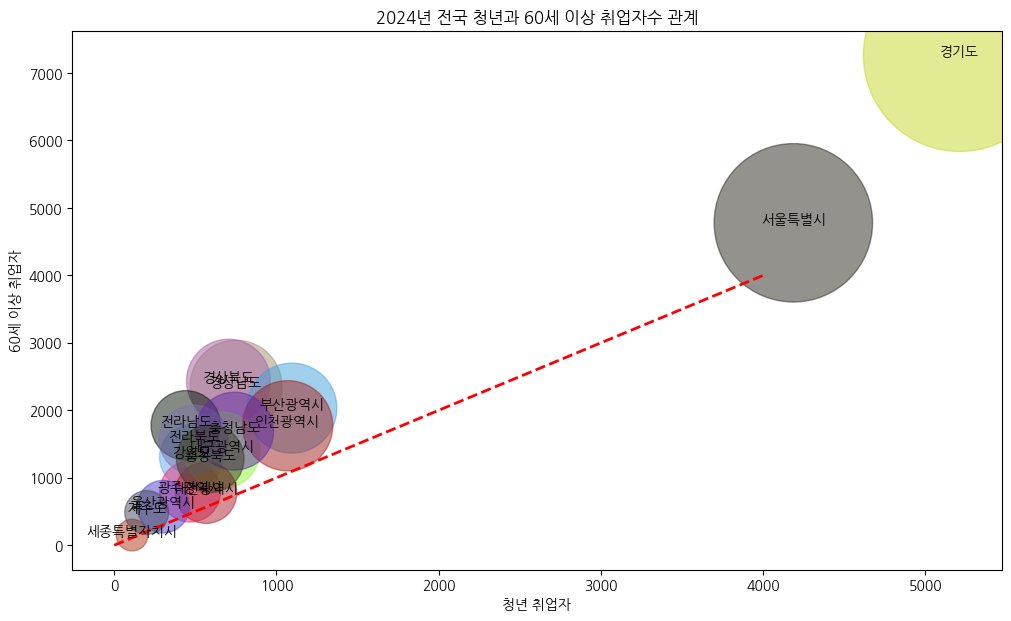

In [20]:
fig , ax = plt.subplots(figsize=(12,7))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y, s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha="center")

ax.plot([0,4000],[0,4000], color="r", linestyle="--", linewidth=2)

ax.set_title("2024년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")
plt.show()

In [21]:
from prophet import Prophet

In [32]:
ex5_data = ori.copy()
ex5_data = ex5_data.groupby('시점')['데이터'].sum().reset_index(name='total')
ex5_data

,시점,total
0,2000,5846098454656814654192281671061711682731692701...
1,2001,5616058524747034834192381931191641692761712752...
2,2002,5346118674747315004352452151251681842731722822...
3,2003,5206158894707435104342561951161471712661512871...
4,2004,5016338834947515274522772161231421692581442832...
...,...,...
64,2024,3514866495836134656194815314251091101771272081...
65,2024.1/4,3665186355716174576264855183971101091801342111...
66,2024.2/4,3514846475936174676154855374271081111781262081...
67,2024.3/4,3514716615896124676174785304351111101771252051...


In [33]:
ex5_data.loc[:,'데이터'] = ex5_data.loc[:,'데이터'].replace("-",0).astype(int)
ex5_data['데이터']

KeyError: '데이터'

In [23]:
m = Prophet()
m.fit(ex5_data)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/취업률예측.png")
plt.figure(figsize=(10,15))
plt.show()